In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

conn = sqlite3.connect('data/im.db',)
cur = conn.cursor()

budget = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col=0)
budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [2]:
budget["domestic_gross"]=budget["domestic_gross"].apply(lambda x: x.replace("$", ""))

budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",0,$0
79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"


In [3]:
budget["domestic_gross"]=budget["domestic_gross"].apply(lambda x: x.replace(",", ""))


In [4]:
budget["domestic_gross"]=pd.to_numeric(budget['domestic_gross'])
budget

In [5]:
budget.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [6]:
columns = ['production_budget','domestic_gross','worldwide_gross']

In [7]:
def cleaning(columns):
    for x in columns:
        budget[x]=budget[x].apply(lambda x: x.replace(",","").replace("$",""))
        budget[x]=pd.to_numeric(budget[x])


In [8]:
cleaning(columns)

In [9]:
budget['worldwide_gross'].head(10)

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
6     2053311220
7     2048134200
8      963420425
9      655945209
10     879620923
Name: worldwide_gross, dtype: int64

In [10]:
"""
def to_int():
    for x in ['production_budget', 'domestic_gross','worldwide_gross']:
        df1[x]=pd.to_numeric(budgets[x])
    return 
"""

"\ndef to_int():\n    for x in ['production_budget', 'domestic_gross','worldwide_gross']:\n        df1[x]=pd.to_numeric(tn_budgets[x])\n    return \n"

In [11]:
budget["domestic_gross"]

id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: int64

In [23]:
budget["domestic_gross"].head(10).sort_values(ascending=False)

id
6     936662225
1     760507625
7     678815482
5     620181382
4     459005868
8     309420425
2     241063875
9     229024295
10    200074175
3      42762350
Name: domestic_gross, dtype: int64

In [24]:
budget["total_gross"]=budget["domestic_gross"]+budget["worldwide_gross"]
budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0,0
79,"Apr 2, 1999",Following,6000,48482,240495,288977
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676


In [25]:
budget["earnings"]=budget["total_gross"]-budget["production_budget"]
budget.sort_values(by="earnings", ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,earnings
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2141215444,1916215444
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2048317790,1848317790
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1871729814,1681729814
44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1851102455,1651102455


In [39]:
firstten_0 = budget.sort_values(by="earnings", ascending=False).head(10)
firstten_1 = firstten_0.loc[:,["movie","production_budget", "earnings"]]
firstten_1 = firstten_1.set_index("movie")

In [82]:
#name_movies = list(firstten["movie"].values)
#ame_movies

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars Ep. VII: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'Avengers: Infinity War'),
  Text(4, 0, 'Jurassic World'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Black Panther'),
  Text(7, 0, 'Furious 7'),
  Text(8, 0, 'Incredibles 2'),
  Text(9, 0, 'Star Wars Ep. VIII: The Last Jedi')])

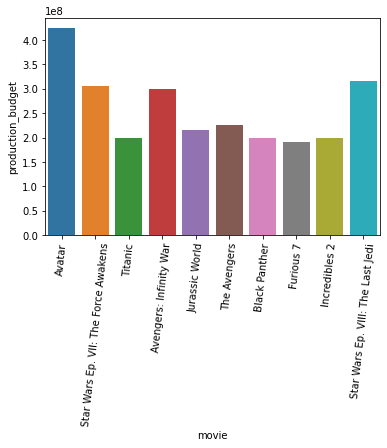

In [53]:
seaborn.barplot(x = "movie", y ="production_budget", data = firstten_1 )
plt.xticks(rotation=84)




In [42]:
firstten

,production_budget,earnings
movie,,
Avatar,425000000,3111852904
Star Wars Ep. VII: The Force Awakens,306000000,2683973445
Titanic,200000000,2667572339
Avengers: Infinity War,300000000,2426949682
Jurassic World,215000000,2086125489
The Avengers,225000000,1916215444
Black Panther,200000000,1848317790
Furious 7,190000000,1681729814
Incredibles 2,200000000,1651102455


Text(0.5, 1.0, 'Budget for each movie')

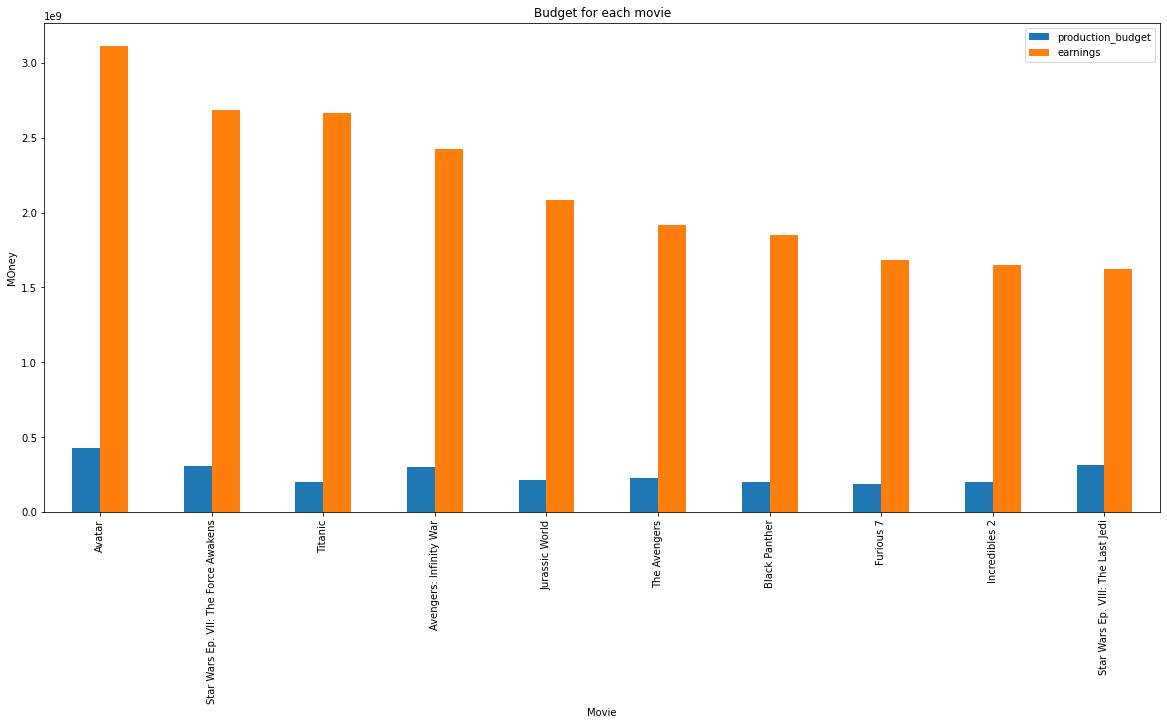

In [50]:
firstten.plot.bar(figsize=(20,9))
plt.xticks(rotation=90)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')

In [55]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_gross.head(10)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [83]:
bom_gross["foreign_gross"].dropna(inplace=True)

In [84]:
bom_gross["foreign_gross"].isna().sum()

1350

In [63]:
bom_gross["foreign_gross"]

In [64]:
bom_gross.info()